In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [10]:
df = pd.read_csv('./ORB/ORB_FINAL.csv')
df = df.sample(frac=1)
X = df.iloc[:, 0:5]
y = df.iloc[:, 6]

In [20]:
from functools import reduce

def _get_model_name(model):
    """
            Returns a string with the name of a sklearn model
                model: Sklearn stimator class
    """
    if isinstance(model, Pipeline):
        estimator = model.steps[-1][1]
        name = "Pipeline_" + str(estimator)[:str(estimator).find("(")]
    else: 
        name = str(model)[:str(model).find("(")]
    return name
    
    
def plot_cv_score(X, y, models_list, cv = 5, scoring_list = None, refit = True, return_scores = False):
    """ 
            X: numpy_array/pandas dataframe n_rows, m_features
            y: numpy_array/pandas dataframe n_rows
            Plots min, max and avg kfold crosval_score for a list of models
        
    """
    
        
        
    names, mean_score = list(), list()
    ldf = list()
    mnames = list()
    
    for i, model in enumerate(models_list):
        name = _get_model_name(model)
    
        if refit:
            model.fit(X, y)
                
        for metric in score_list:
            
            score = cross_val_score(model, X, y, cv = None, scoring = metric, n_jobs= -1)
            print(score)
            mean_score.append(np.mean(score))
    
    
        tmp = pd.DataFrame({name: mean_score}, index = score_list)
        
            
            
        ldf.append(tmp)
        
        
        mean_score = list()
        
    frame_scores = reduce(lambda x,y: pd.merge(x,y, left_index = True, right_index = True), ldf).T
        
    
    
    fig, ax  = plt.subplots(1,1, figsize = (10,5))

    frame_scores.plot.bar(ax = ax, cmap = 'RdYlBu', edgecolor = "black")
    ax.legend(loc = 'best')
    ax.set_xlabel("Score")
    ax.set_title("Cross validation model benchmark")

    if return_scores:    
        return frame_scores

[nan nan nan nan nan]
[0.6626087  0.67478261 0.68989547 0.69163763 0.6533101 ]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[0.75652174 0.77217391 0.77526132 0.77351916 0.79616725]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[0.74956522 0.78086957 0.81184669 0.77874564 0.80139373]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[0.64521739 0.64       0.67421603 0.63414634 0.67944251]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]


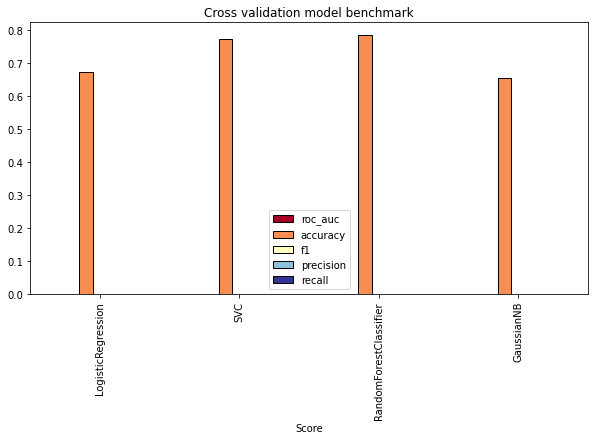

In [21]:
models_list =[LogisticRegression(random_state= 42),
              SVC(probability= True),
              RandomForestClassifier(random_state = 42),
              GaussianNB()]

score_list = ["roc_auc", "accuracy", "f1", "precision", "recall"]

t = plot_cv_score(X = X, y = y, models_list = models_list, cv = 5, scoring_list = score_list, refit = True)